In [127]:
import pickle
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Téléchargement des datasets

In [128]:
dossier = "dataset"
hashtags = ["cat", "car", "dog", "flower", "bird"]

with open(f'{dossier}/images_{hashtags[0]}_1000.pkl', 'rb') as file :
    df1 = pickle.load(file)

with open(f'{dossier}/images_{hashtags[1]}_1000.pkl', 'rb') as file :
    df2 = pickle.load(file)

with open(f'{dossier}/images_{hashtags[2]}_1000.pkl', 'rb') as file :
    df3 = pickle.load(file)

with open(f'{dossier}/images_{hashtags[3]}_1000.pkl', 'rb') as file :
    df4 = pickle.load(file)

with open(f'{dossier}/images_{hashtags[4]}_1000.pkl', 'rb') as file :
    df5 = pickle.load(file)

In [129]:
df5 = pd.DataFrame({'image': df5})

# Ajout colonne label

In [131]:
df1["label"]="cat"
df2["label"]="car"
df3["label"]="dog"
df4["label"]="flower"
df5["label"]="bird"


In [132]:
df5.head(5)

,image,label
0,"[[[0.4117647058823529, 0.4745098039215686, 0.1...",bird
1,"[[[0.1450980392156863, 0.12941176470588237, 0....",bird
2,"[[[0.3607843137254902, 0.37254901960784315, 0....",bird
3,"[[[0.23137254901960785, 0.5764705882352941, 0....",bird
4,"[[[0.807843137254902, 0.5215686274509804, 0.39...",bird


# Split train test

In [133]:
percent_test = 0.2

In [134]:
liste_test = np.random.choice(1000, int(1000*percent_test), replace=False)
liste_train = np.setdiff1d(np.arange(1000), liste_test)

In [135]:
df1_test = df1.iloc[liste_test]
df2_test = df2.iloc[liste_test]
df3_test = df3.iloc[liste_test]
df4_test = df4.iloc[liste_test]
df5_test = df5.iloc[liste_test]

In [136]:
df1_train = df1.iloc[liste_train]
df2_train = df2.iloc[liste_train]
df3_train = df3.iloc[liste_train]
df4_train = df4.iloc[liste_train]
df5_train = df5.iloc[liste_test]

# Merge et shuffle

In [137]:
merged_df_test = pd.concat([df1_test, df2_test, df3_test, df4_test, df5_test], ignore_index=True)

In [138]:
merged_df_train = pd.concat([df1_train, df2_train, df3_train, df4_train, df5_train], ignore_index=True)

In [139]:
df_test = shuffle(merged_df_test)

In [140]:
df_train = shuffle(merged_df_train)

In [141]:
df_test= df_test.reset_index(drop=True)

In [142]:
df_train= df_train.reset_index(drop=True)

In [143]:
len(df_test)

1000

In [144]:
len(df_train)

3400

# Enregistrement du dataset

In [145]:
dossier = "dataset"

with open(f'{dossier}/images_test.pkl', 'wb') as file :
    pickle.dump(df_test, file)

with open(f'{dossier}/images_train.pkl', 'wb') as file :
    pickle.dump(df_train, file)



# Test load

In [146]:
with open(f'{dossier}/images_test.pkl', 'rb') as file :
    dfA = pickle.load(file)

with open(f'{dossier}/images_train.pkl', 'rb') as file :
    dfB = pickle.load(file)

In [147]:
import matplotlib.pyplot as plt

In [148]:
def affiche_images(liste_images, number_one, figsize=(20, 20)):

    images_per_row = 5
    num_rows = (len(liste_images) + images_per_row - 1) // images_per_row

    fig, axs = plt.subplots(num_rows, images_per_row, figsize=figsize) 

    for i, image in enumerate(liste_images):
        row = i // images_per_row
        col = i % images_per_row
  
        ax = axs[row, col]
        ax.imshow(image)
        ax.set_title(f"Image {i+number_one}")
        ax.axis('off')

    for i in range(len(liste_images), num_rows * images_per_row):
        row = i // images_per_row
        col = i % images_per_row
        axs[row, col].axis('off')

    plt.tight_layout()  
    plt.show()

/tmp/ipykernel_29087/193889142.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


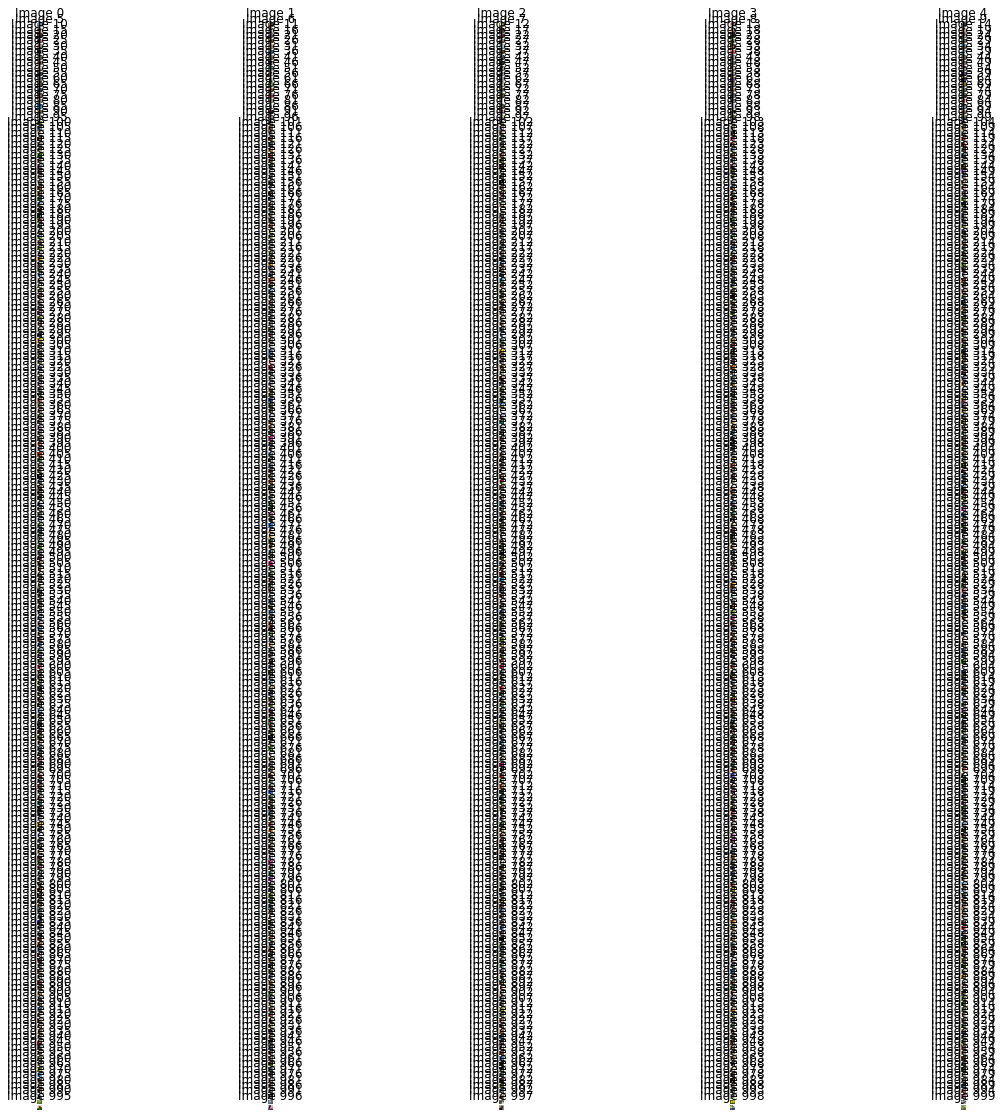

In [149]:
images_500 = dfA.iloc[:]['image']

affiche_images(images_500,0)

# Affichage images

In [150]:
def affiche_images5(liste_images, number_one, figsize=(15, 5)):

    images_per_row = 5
    num_rows = (len(liste_images) + images_per_row - 1) // images_per_row
 
    fig, axes = plt.subplots(1, 5, figsize=figsize) 
    for i, img in enumerate(liste_images):
        axes[i].imshow(liste_images[i+number_one], cmap='gray')  # 'cmap' est l'échelle de couleur, vous pouvez la changer
        axes[i].set_title(f'Image {i+1}')  # Titre facultatif pour chaque image
        axes[i].axis('off')

    plt.tight_layout()  
    plt.show()

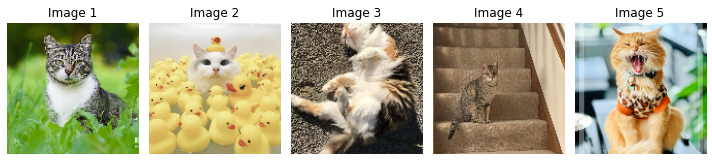

In [151]:
img = df1.iloc[:11]['image']
affiche_images5(img[6:],6, figsize=(10,15))

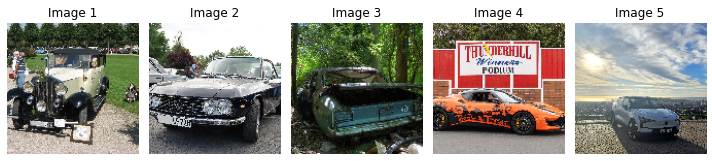

In [152]:
img = df2.iloc[:5]['image']
affiche_images5(img,0, figsize=(10,15))

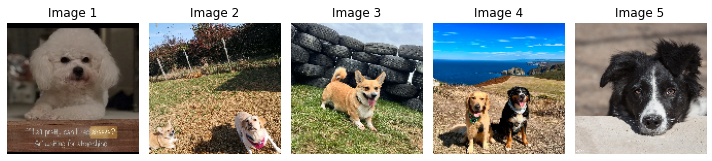

In [153]:
img = df3.iloc[:20]['image']
affiche_images5(img[15:],15, figsize=(10,15))

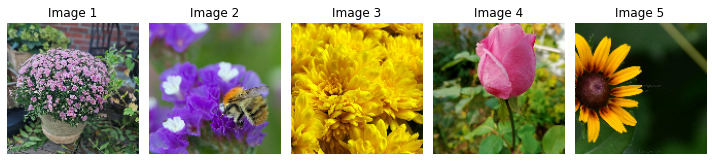

In [154]:
img = df4.iloc[:5]['image']
affiche_images5(img,0, figsize=(10,15))

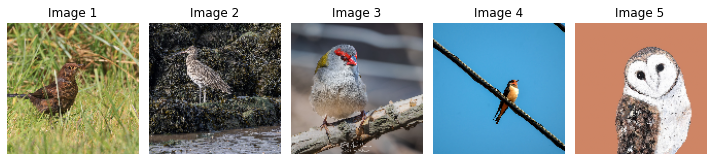

In [155]:
img = df5.iloc[:5]['image']
affiche_images5(img,0, figsize=(10,15))